In [1]:
import autograd
import scipy.optimize
import autograd.numpy as np
import matplotlib.pyplot as plt
import alignment.SparseAlign as sa
import alignment.doming_model as dom

In [2]:
np.random.seed(100)

num_true_θs = 10
N_p = 6

# generate random locations
true_θxs = np.random.uniform(low=-0.4, high=0.4, size=num_true_θs)
true_θzs = np.random.uniform(low=-0.1, high=0.1, size=num_true_θs)

true_ws = np.ones(num_true_θs)

# ground truth deformation parameters
true_p1 = np.zeros(N_p)
true_p2 = np.array([0.0, 1, 1, 1, 1, 1])

### Solve for initial marker locations and deformation parameters using the doming model approach

In [3]:
# generate doming model data
y_dm = dom.F(true_θxs, true_θzs, true_p1, true_p2) 
y_dm.shape

(20, 10)

0 0.6036987136301504
1 0.38225148272993115
2 0.26084360785907335
3 0.18480915847319268
4 0.13429099336040307
5 0.09939247296891562
6 0.07192134039890456
7 0.04864060002661441
8 0.030602846167216827
9 0.019500476679330206
10 0.012483278871316316
11 0.008011511977992552
12 0.0052110339365574
13 0.0034646172490859738
14 0.0023461329549440534
15 0.0015935908936887892
16 0.001075906763206692
17 0.0007114701447301784
18 0.00047280292210577144
19 0.00033553928829839854
20 0.00025143594344141857
21 0.00019584965756615534
22 0.00015654212499561083
23 0.00012736326132907667
24 0.00010483220592278806
[0.0210242  1.12067227 1.26763261 0.60645409 0.33975903 1.00742559] [0. 1. 1. 1. 1. 1.]


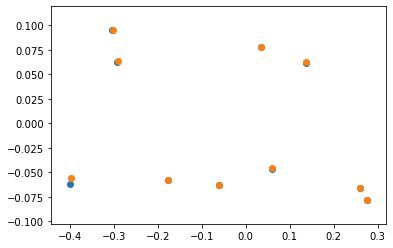

In [4]:
# optimize for initial locations and deformation parameters
history_dm = dom.doming_model_opt(y_dm, 
                                                    np.zeros_like(true_θxs), 
                                                    np.zeros_like(true_θzs), 
                                                    np.zeros(6), np.zeros(6), iters=25)

# show final result
θxs_dm = history_dm[-1][1]
θzs_dm = history_dm[-1][2]
p1_dm = history_dm[-1][3]
p2_dm = history_dm[-1][4]

plt.scatter(θxs_dm, θzs_dm)
plt.scatter(true_θxs, true_θzs)

print(p2_dm, true_p2)

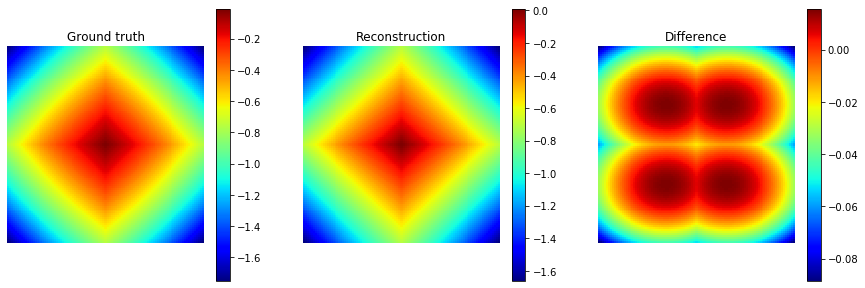

In [5]:
# show deformation field
import alignment.motion_model as mm
num_grid_pts_v = 100
grid_x_v = np.linspace(-0.5, 0.5,num_grid_pts_v)
grid_y_v = np.linspace(-0.5,0.5,num_grid_pts_v)

grid_v = np.meshgrid(grid_x_v, grid_y_v)
grid_pts_v = np.vstack([grid_v[0].ravel(), grid_v[1].ravel()])

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Ground truth')
plt.imshow((mm.deformation(true_p1, true_p2, grid_pts_v[0], grid_pts_v[1]))[1].reshape([num_grid_pts_v,num_grid_pts_v]),
           cmap='jet')
plt.axis('off')
plt.colorbar()
plt.subplot(132)
plt.title('Reconstruction')
plt.imshow((mm.deformation(p1_dm, p2_dm, grid_pts_v[0], grid_pts_v[1]))[1].reshape([num_grid_pts_v,num_grid_pts_v]),
          cmap='jet')
plt.axis('off')
plt.colorbar()
plt.subplot(133)
plt.title('Difference')
plt.imshow((mm.deformation(true_p1, true_p2, grid_pts_v[0], grid_pts_v[1]))[1].reshape([num_grid_pts_v,num_grid_pts_v]) -
           (mm.deformation(p1_dm, p2_dm, grid_pts_v[0], grid_pts_v[1]))[1].reshape([num_grid_pts_v,num_grid_pts_v]), 
           cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

### Solve for initial marker locations and deformation parameters using SparseAlign

In [6]:
# generate SparseAlign data
y = sa.F(true_ws, true_θxs, true_θzs, true_p1, true_p2)
y.shape

(20, 64)

In [7]:
history_sa = sa.SparseAlign(y,num_true_θs+1,all_at_once=True)

0 1732.8055342048128



1 1365.467650181962



2 1071.496706114895



3 783.8168385570181



4 555.9965670968805



5 413.30105391762106



6 276.39373333798807



7 179.0777995824365



8 92.06383904094693



9 42.273861515426816



10 0.10056610913675901


[0. 1. 1. 1. 1. 1.] [0.0210242  1.12067227 1.26763261 0.60645409 0.33975903 1.00742559] [0.         1.03367053 1.09163846 1.12465447 0.         0.        ]


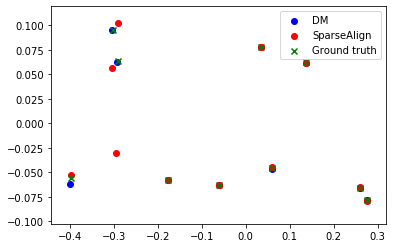

In [8]:
# show final result
θxs_sa = history_sa[-1][1]
θzs_sa = history_sa[-1][2]
p1_sa = history_sa[-1][4]
p2_sa = history_sa[-1][5]

plt.scatter(θxs_dm, θzs_dm, c='b', label='DM')
plt.scatter(θxs_sa, θzs_sa, c='r', label='SparseAlign')
plt.scatter(true_θxs, true_θzs, c='g', marker='x', label='Ground truth')

plt.legend()

print(true_p2, p2_dm, p2_sa)

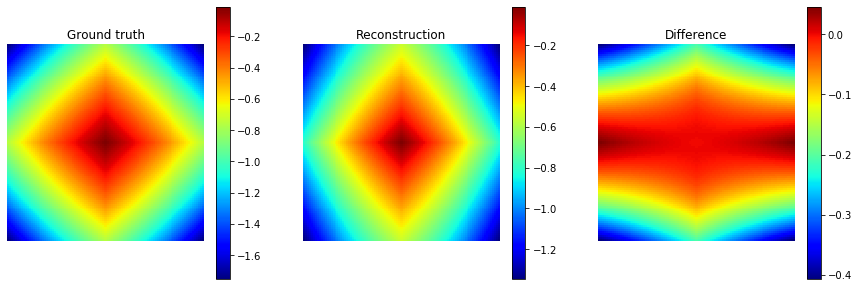

In [9]:
# show deformation field


plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Ground truth')
plt.imshow((mm.deformation(true_p1, true_p2, grid_pts_v[0], grid_pts_v[1]))[1].reshape([num_grid_pts_v,num_grid_pts_v]),
           cmap='jet')
plt.axis('off')
plt.colorbar()
plt.subplot(132)
plt.title('Reconstruction')
plt.imshow((mm.deformation(p1_sa, p2_sa, grid_pts_v[0], grid_pts_v[1]))[1].reshape([num_grid_pts_v,num_grid_pts_v]),
          cmap='jet')
plt.axis('off')
plt.colorbar()
plt.subplot(133)
plt.title('Difference')
plt.imshow((mm.deformation(true_p1, true_p2, grid_pts_v[0], grid_pts_v[1]))[1].reshape([num_grid_pts_v,num_grid_pts_v]) -
           (mm.deformation(p1_sa, p2_sa, grid_pts_v[0], grid_pts_v[1]))[1].reshape([num_grid_pts_v,num_grid_pts_v]), 
           cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()